### Machine learning mini project
### Team members - Aditya Arvikar 37 & Aayush Pande 41


### Import the required libraries


In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # for numeric analysis
import matplotlib.pyplot as plt # To plot the data
import seaborn as sns # For data visualisation

## Step 1- Load the data set

In [2]:
data = pd.read_csv('climate_change_indicators.csv')
data

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


### Step 2- Data cleaning and formatting


In [13]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Drop rows or columns with high missing values or irrelevant columns
# Assuming 'Country', 'ISO2', 'ISO3', etc., are identifiers and not needed for modeling
data_cleaned = data.drop(columns=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'])

# Drop rows with missing values in the cleaned data
data_cleaned = data_cleaned.dropna()

# Verify the cleaned data
print("Shape after cleaning:", data_cleaned.shape)
print(data_cleaned.head())


Missing values per column:
ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
F2018        12
F2019        12
F2020        13
F2021        12
F2022        12
Length: 72, dtype: int64
Shape after cleaning: (158, 62)
   F1961  F1962  F1963  F1964  F1965  F1966  F1967  F1968  F1969  F1970  ...  \
0 -0.113 -0.164  0.847 -0.764 -0.244  0.226 -0.371 -0.423 -0.539  0.813  ...   
1  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074  0.081 -0.013 -0.106  ...   
2  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026 -0.067  0.291  0.116  ...   
4  0.736  0.112 -0.752  0.308 -0.490  0.415  0.637  0.018 -0.137  0.121  ...   
5  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081 -0.193  0.188  0.248  ...   

   F2013  F2014  F2015  F2016  F2017  F2018  F2019  F2020  F2021  F2022  
0  1.281  0.456  1.093  1.555  1.540  1.544  0.910  0.498  1.327  2.012  
1  1.333  1.198  1.569  1.464  1.121  2.028  1.675  1.498  1.536  1.518  
2  1.192  1.690  1.121  1.757  1.512 

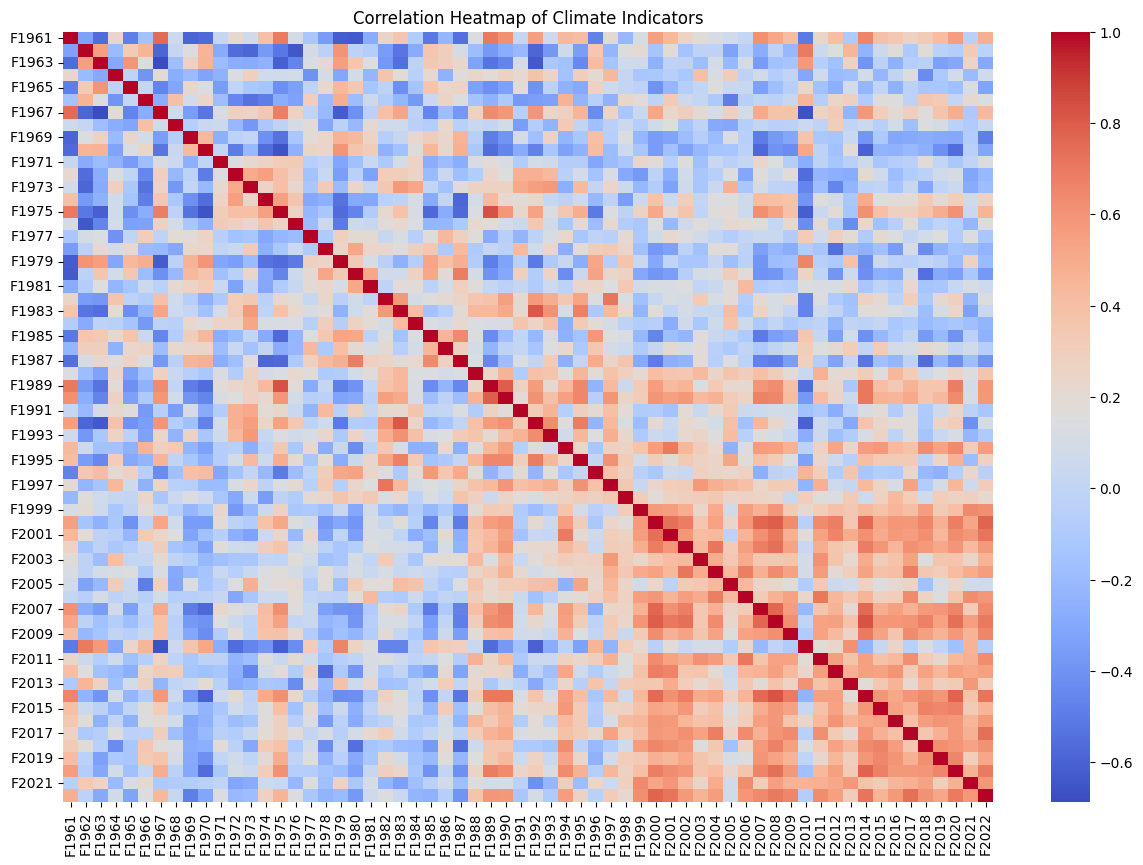

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap for all numeric features
plt.figure(figsize=(15, 10))
sns.heatmap(data_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Climate Indicators")
plt.show()


In [15]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features (if any)
selector = VarianceThreshold(threshold=0.1)
data_selected = selector.fit_transform(data_cleaned)

# Check the shape after feature selection
print("Shape after feature selection:", data_selected.shape)


Shape after feature selection: (158, 52)


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'F2022' is the target variable; adjust as necessary
X = data_selected[:, :-1]  # Features
y = data_cleaned['F2022'].values  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing sets created.")


Training and testing sets created.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Evaluate each model with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} R^2 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")


Linear Regression R^2 Score: 0.7683 (+/- 0.0544)
Random Forest R^2 Score: 0.7412 (+/- 0.0601)
Support Vector Regressor R^2 Score: 0.8166 (+/- 0.0927)


In [18]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [19]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Test R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Test R^2 Score: 0.8943
Mean Squared Error: 0.0427


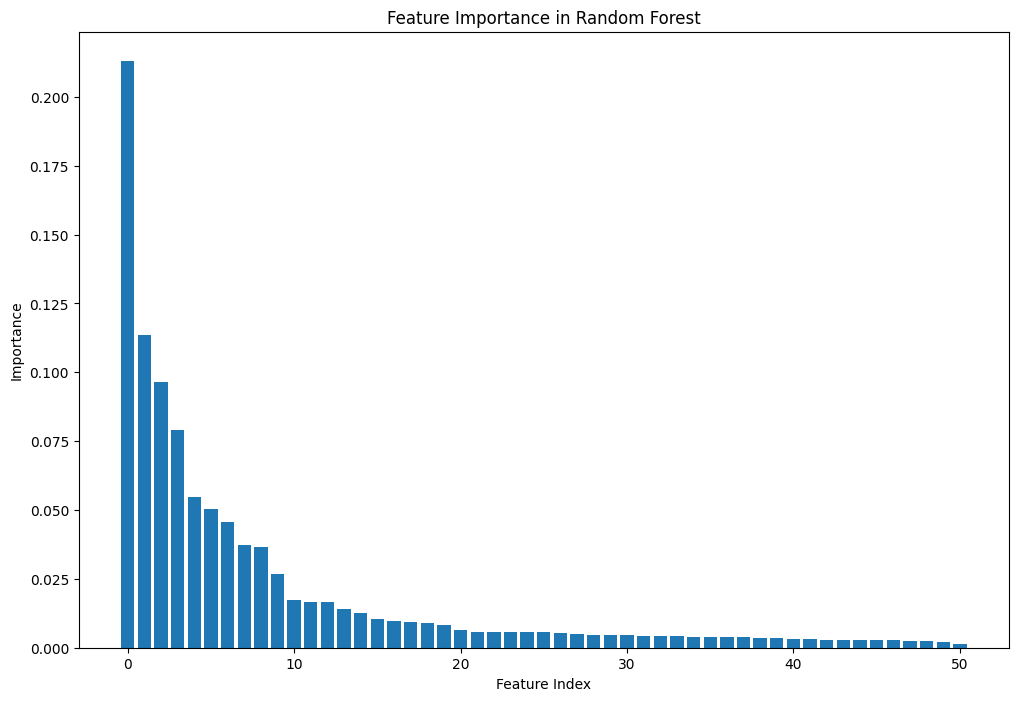

In [20]:
# Feature importance (only applicable for tree-based models)
importances = best_model.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(indices)), importances[indices], align='center')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()
